In [47]:
import pandas as pd

1. drinks.csv 파일 로드
2. 결측치 확인
3. continent 컬럼에 결측치 존재 -> 결측치는 'OT' 변경
4. continent별 spirit_saving 컬럼의 평균,최소,최대, 합을 출력
5. 이 데이터를 바형 그래프 출력
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent

In [48]:
dr = pd.read_csv("../csv/drinks.csv")
dr.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [49]:
dr.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [50]:
#case1.
dr["continent"] = dr["continent"].fillna("OT")
dr.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [51]:
import matplotlib.pyplot as plt

In [64]:
dr1 = dr.groupby("continent").agg(["mean","sum","min","max"])["spirit_servings"]

dr1



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24488\1653730311.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dr1 = dr.groupby("continent").agg(["mean","sum","min","max"])["spirit_servings"]


,mean,sum,min,max
continent,,,,
AF,16.339623,866,0,152
AS,60.840909,2677,0,326
EU,132.555556,5965,0,373
OC,58.437500,935,0,254
OT,165.739130,3812,68,438
SA,114.750000,1377,25,302


In [53]:
dr2 = dr.groupby("continent").mean()["spirit_servings"]





In [ ]:
dr3 = dr.groupby("continent").max()["spirit_servings"]

dr3


In [ ]:
dr4 = dr.groupby("continent").min()["spirit_servings"]

dr4

In [60]:
di = dr1.index

In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# 시각화 바 그래프로 표시
# plt.bar(x,y)
# x -> 그룹화 기준 continent
# y -> 평균,합계,최소,최대
# 총 4개의 그래프를 subplot

means = dr1["mean"]
min = dr1["min"]
max = dr1["max"]
sum = dr1["sum"]

x = dr1.index
x

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

<BarContainer object of 6 artists>

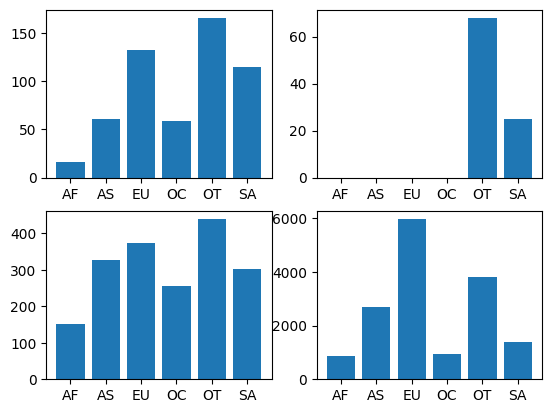

In [72]:
## subplot(행의수 열의수 위치)
# 4개의 그래프 행의 수 * 열의수=4

plt.subplot(2,2,1)
plt.bar(x,means)
plt.subplot(2,2,2)
plt.bar(x,min)
plt.subplot(2,2,3)
plt.bar(x,max)
plt.subplot(2,2,4)
plt.bar(x,sum)

In [74]:
## 전체 데이터의 술 소비량 평균

total_mean = dr["total_litres_of_pure_alcohol"].mean()
total_mean

4.717098445595855

In [76]:
# 대륙 별 소비량의 평균

nt = dr.groupby("continent").mean("total_litres_of_pure_alcohol")

In [71]:
tr1 = pd.read_csv("../csv/transaction_1.csv")
tr2 = pd.read_csv("../csv/transaction_2.csv")
tr3 = pd.read_csv("../csv/transaction_detail_1.csv")
tr4 = pd.read_csv("../csv/transaction_detail_2.csv")

tr1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [77]:
import numpy as np

In [82]:
cnt = len(x)
cnt

6

In [83]:
index = np.arange(cnt)
index

array([0, 1, 2, 3, 4, 5])

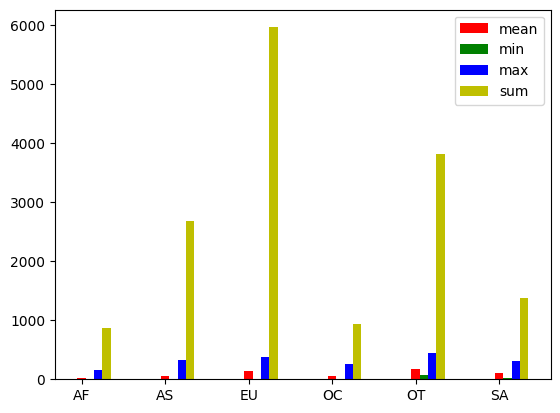

In [95]:
from cProfile import label


bar_width = 0.1 

plt.bar(index, means, bar_width, color="r",label="mean")
plt.bar(index+bar_width, min, bar_width,color="g",label="min")
plt.bar(index+bar_width*2, max , bar_width,color = "b",label="max")
plt.bar(index+bar_width*3, sum, bar_width,color = "y",label="sum")

plt.xticks(index,x)
plt.legend()

plt.show()